In [18]:
from mira.examples.sir import sir_parameterized
from mira.metamodel.ops import stratify
from mira.metamodel.ops import simplify_rate_laws
from mira.modeling.viz import GraphicalModel

### First stratification into 3 age groups

In [19]:
tm = stratify(sir_parameterized,
         key='age',                            # Stratify by age
         strata=['young', 'middle', 'old'],    # These are the 3 strata needed
         structure=[],                         # No transition between age groups
         cartesian_control=True,               # All age groups can control
         modify_names=True,                    # Make sure we rename concepts
    )

In [20]:
tm2 = simplify_rate_laws(tm)

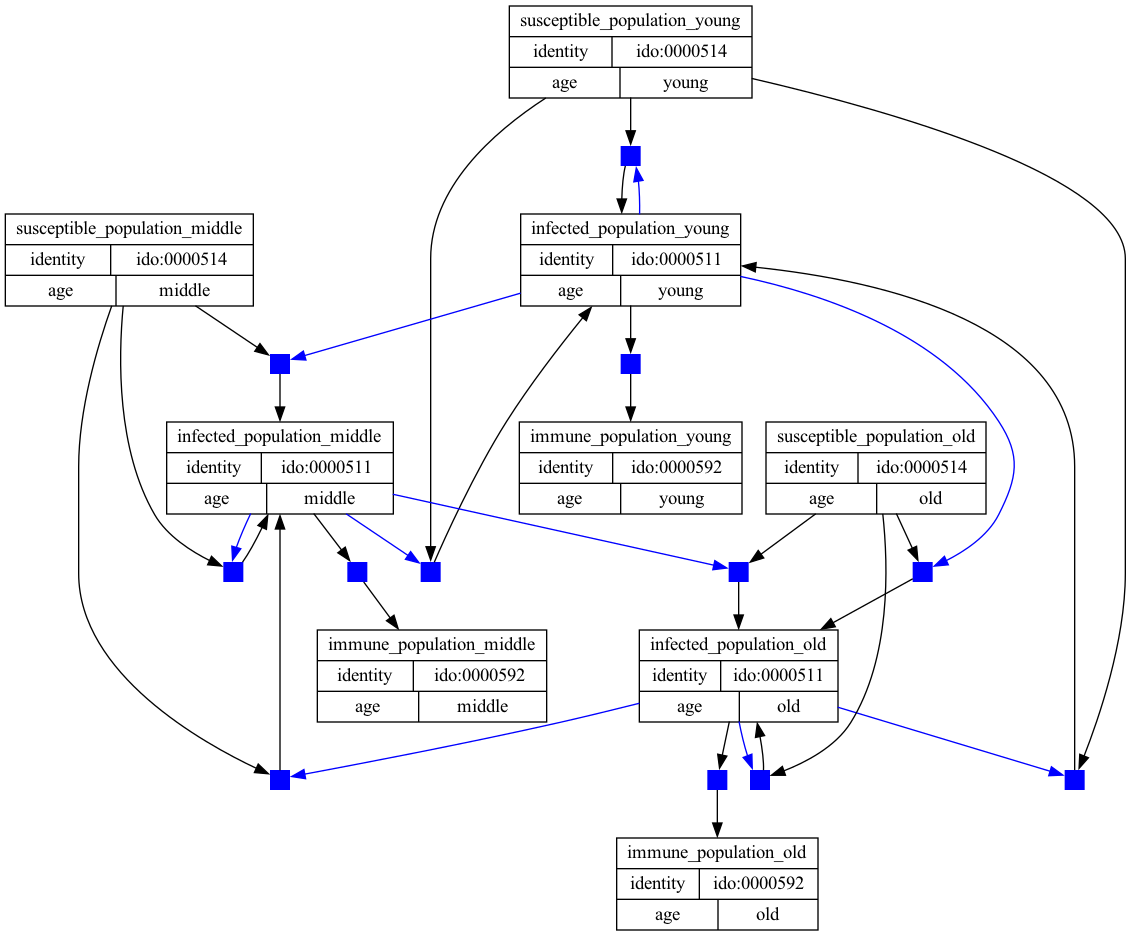

In [21]:
GraphicalModel.for_jupyter(tm2, width="30%")

### Second stratification into multiple age groups

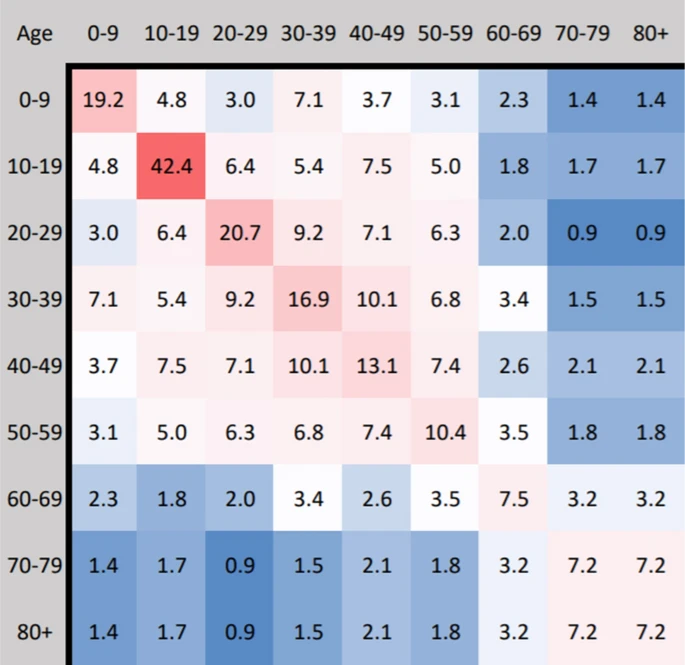

In [27]:
age_groups = ['%d_%d' % (i*10, (i+1)*10-1) for i in range(8)] + ['80']

In [28]:
age_groups

['0_9', '10_19', '20_29', '30_39', '40_49', '50_59', '60_69', '70_79', '80']

In [30]:
tm = stratify(sir_parameterized,
         key='age',                            # Stratify by age
         strata=age_groups,                    # These are the strata needed
         structure=[],                         # No transition between age groups
         cartesian_control=True,               # All age groups can control
         modify_names=True,                    # Make sure we rename concepts
    )
tm3 = simplify_rate_laws(tm)

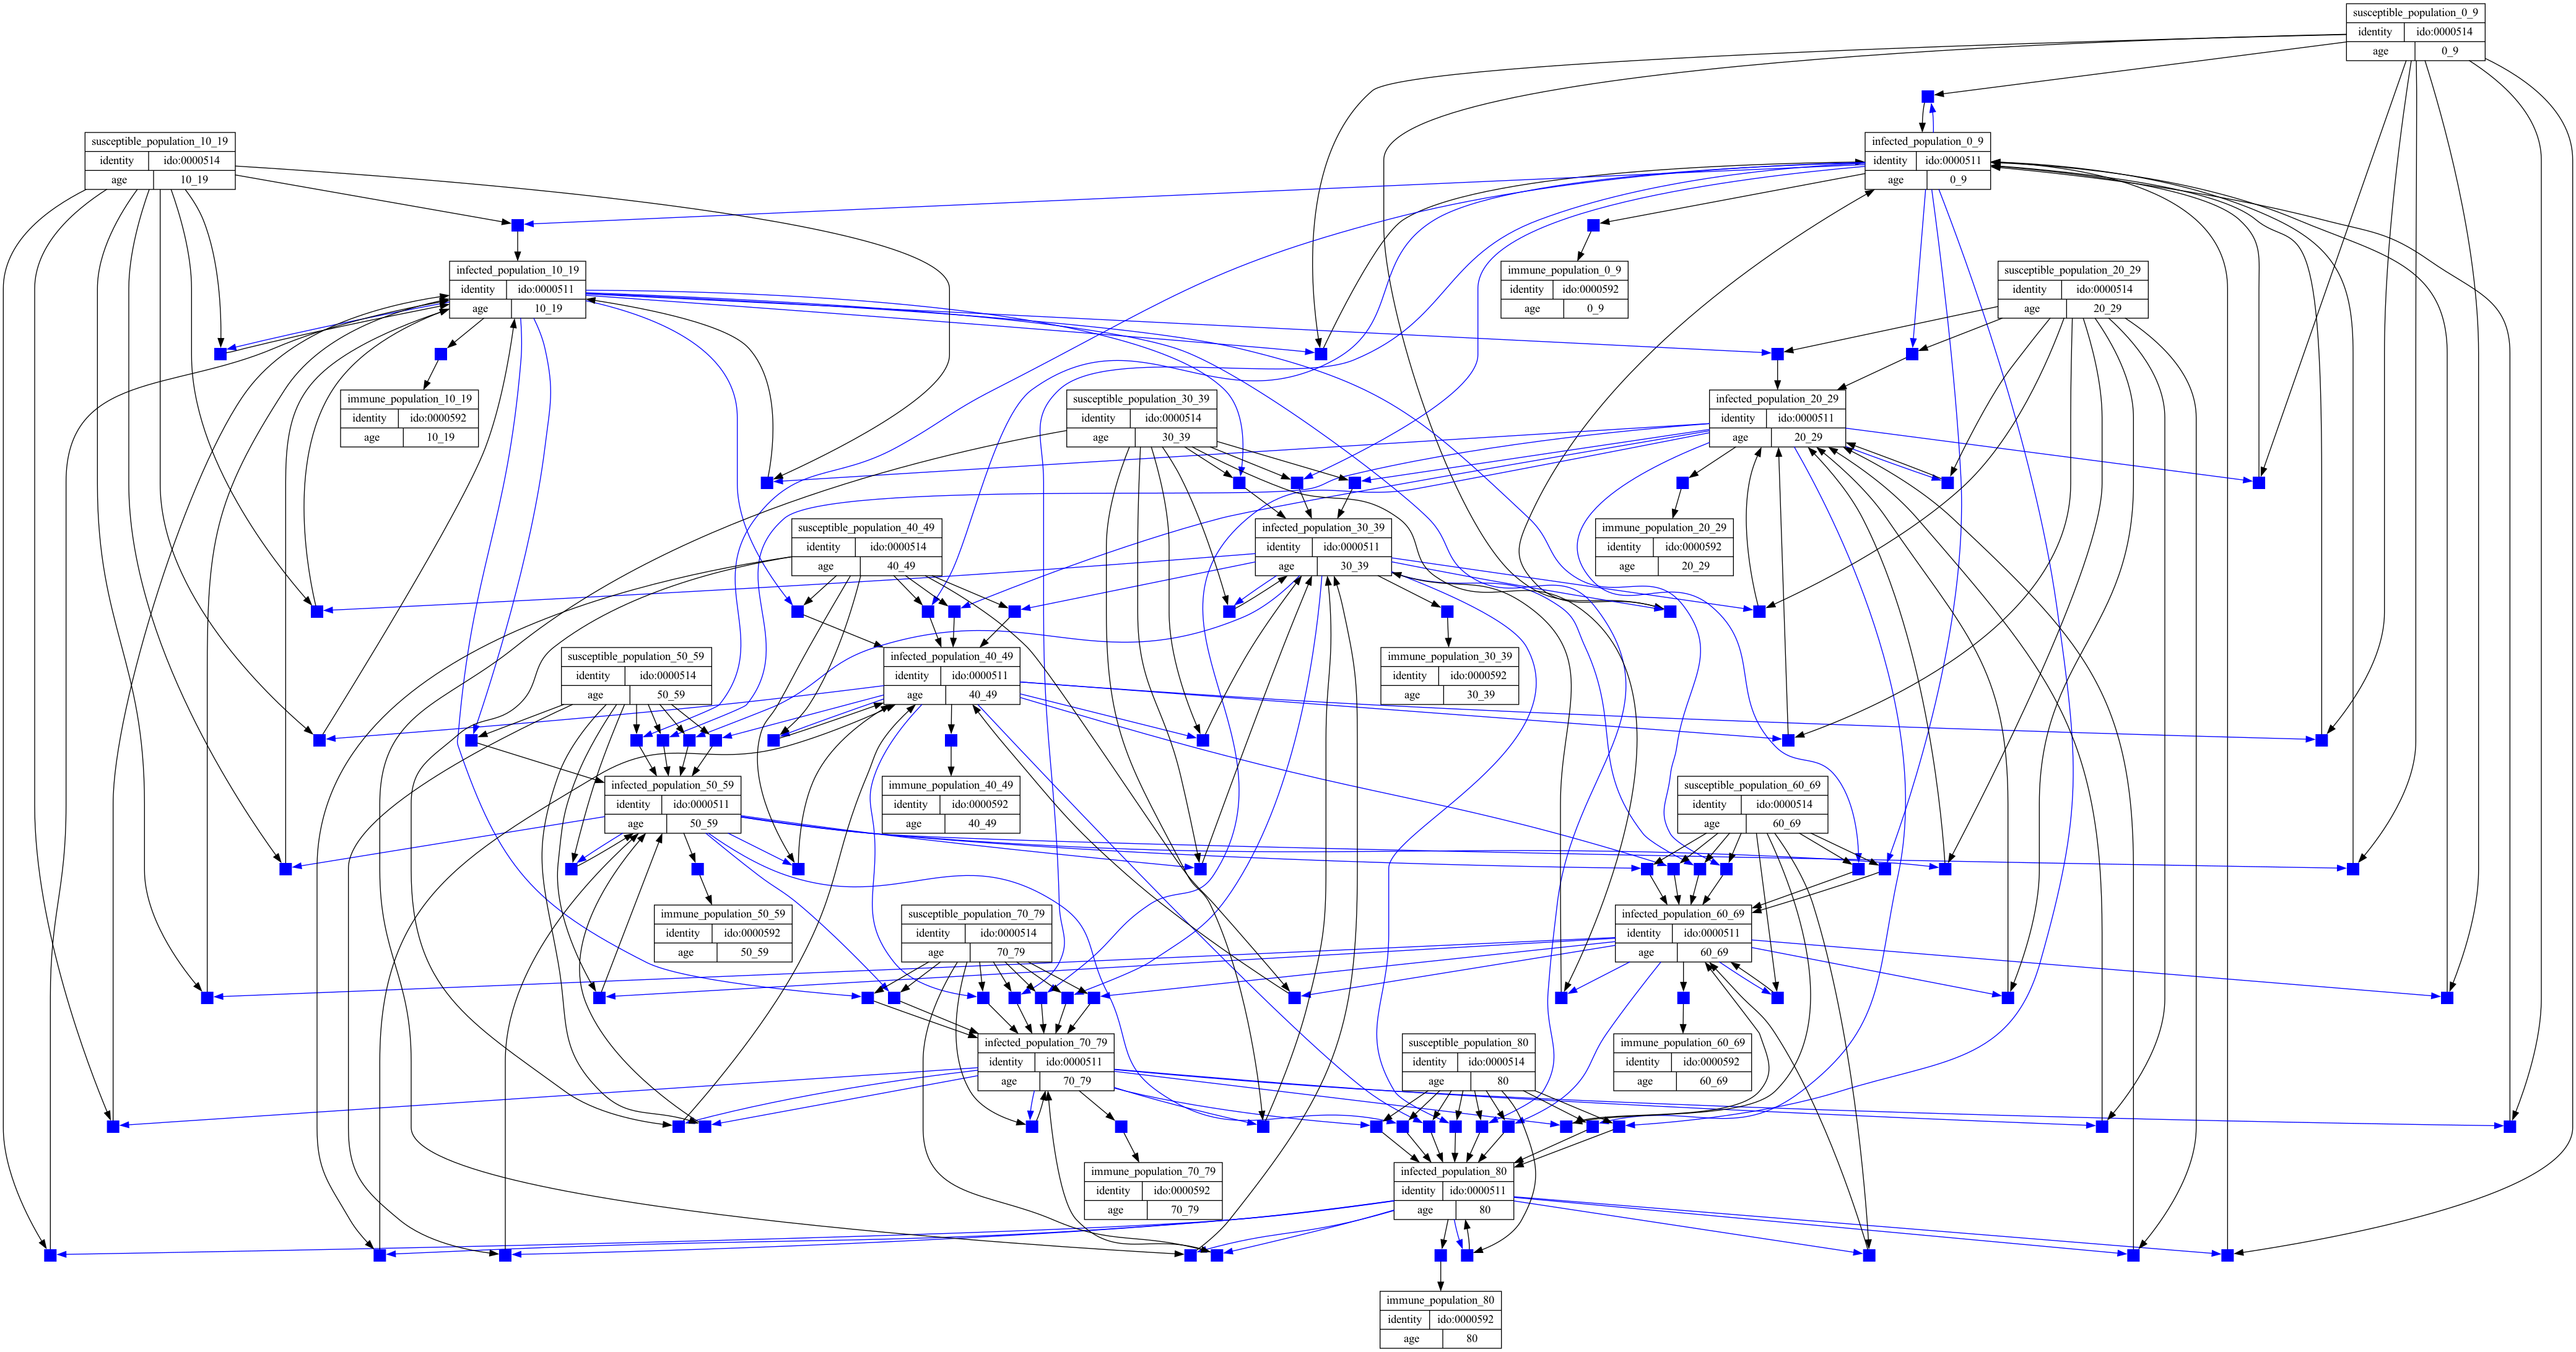

In [33]:
GraphicalModel.for_jupyter(tm3, width="90%")

In [35]:
tm3.parameters

{'beta': Parameter(name='beta', identifiers={}, context={}, value=0.1),
 'gamma': Parameter(name='gamma', identifiers={}, context={}, value=0.2),
 'mira_param_strat_0': Parameter(name='mira_param_strat_0', identifiers={}, context={}, value=0.1),
 'mira_param_strat_1': Parameter(name='mira_param_strat_1', identifiers={}, context={}, value=0.1),
 'mira_param_strat_2': Parameter(name='mira_param_strat_2', identifiers={}, context={}, value=0.1),
 'mira_param_strat_3': Parameter(name='mira_param_strat_3', identifiers={}, context={}, value=0.1),
 'mira_param_strat_4': Parameter(name='mira_param_strat_4', identifiers={}, context={}, value=0.1),
 'mira_param_strat_5': Parameter(name='mira_param_strat_5', identifiers={}, context={}, value=0.1),
 'mira_param_strat_6': Parameter(name='mira_param_strat_6', identifiers={}, context={}, value=0.1),
 'mira_param_strat_7': Parameter(name='mira_param_strat_7', identifiers={}, context={}, value=0.1),
 'mira_param_strat_8': Parameter(name='mira_param_stra